In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re
import pickle

In [4]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
cols_target=['insult','toxic','severe_toxic','identity_hate','threat','obscene']

In [6]:
print(test_df.isnull().any())

id              False
comment_text    False
dtype: bool


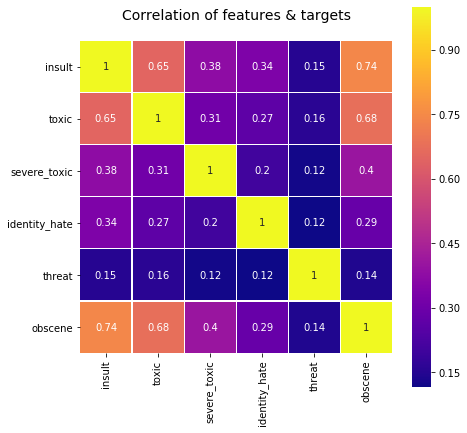

In [7]:
data=train_df[cols_target]
colormap=plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,linecolor='white',annot=True)

In [8]:
import re

In [10]:
def clean_text(text):
    text=text.lower()
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"\'s"," ",text)
    text=re.sub(r"\'ve","have",text)
    text=re.sub(r"can't","cannot",text)
    text=re.sub(r"n't","not",text)
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"\'re","are",text)
    text=re.sub(r"\'d","would",text)
    text=re.sub(r"\'ll","will",text)
    text=re.sub(r"\'scuse","excuse",text)
    text=re.sub('\W',' ',text)
    text=re.sub('\s+',' ',text)
    text=text.strip(' ')
    return text


In [12]:
train_df['comment_text']=train_df['comment_text'].map(lambda com : clean_text(com))
test_df['comment_text']=test_df['comment_text'].map(lambda com : clean_text(com))

In [13]:
train_text=train_df['comment_text']
test_text=test_df['comment_text']
all_text=pd.concat([train_text,test_text])

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
word_vect=CountVectorizer(
                          strip_accents='unicode',
                          analyzer='word',
                          token_pattern=r'\w{1,}',
                          stop_words='english',
                          ngram_range=(1,1)
                          )

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [15]:
word_vect.fit(all_text)
train_features=word_vect.transform(train_text)
test_features=word_vect.transform(test_text)
pickle.dump(word_vect.vocabulary_,open('word_feats.pkl','wb'))

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg=LogisticRegression(C=12.0)
submission_binary=pd.read_csv('sample_submission.csv')
mapper={}
for label in cols_target:
    mapper[label]=logreg
    filename=str(label+'_model.sav')
    print(filename)
    print('...Processing {}'.format(label))
    y=train_df[label]
    mapper[label].fit(train_features,y)
    pickle.dump(mapper[label],open(filename,'wb'))
    y_pred_X=mapper[label].predict(train_features)
    print('Training accuracy is {}'.format(accuracy_score(y,y_pred_X)))
    test_y_prob=mapper[label].predict_proba(test_features)[:,1]
    submission_binary[label]=test_y_prob

insult_model.sav
...Processing insult


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


Training accuracy is 0.9623365147802545
toxic_model.sav
...Processing toxic


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


Training accuracy is 0.954477943987316
severe_toxic_model.sav
...Processing severe_toxic


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


Training accuracy is 0.9908692682254294
identity_hate_model.sav
...Processing identity_hate


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


Training accuracy is 0.9914270136804306
threat_model.sav
...Processing threat


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


Training accuracy is 0.9972300731335895
obscene_model.sav
...Processing obscene
Training accuracy is 0.9719748575869049


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [19]:
submission_binary.to_csv('submission_binary.csv',index=False)